In [177]:
#Final Project
#This cell includes all the python libraries that will be utilized throughout this project. 
#They are placed on top so I can import them as shorten versions of their libraries for simplicity and convinience.
import numpy as np #Is fundemental when working with numerical data, and is necessary to work with others packages,
import pandas as pd #Allows me to directly import my csv file, create tables, arrays, and lets me filter any tabular data that I may need.
import matplotlib.pyplot as plt #The package that allows visuals to be made on python, especially various plot types that are used below. 
from scipy.optimize import curve_fit#Used to solve system of equations and perform any curve fitting from the visuals used with matplotlib.pyplot

In [178]:
#Standardizes the visuals I want consistent throughout the rest of the plots so I don't have to do so individually throughout the rest of the code.
plt.rcParams["font.size"] = 12 #Sets my default text size to 12. I may change it later on, but I want to keep it to maintain some form of standardization if necesssary.
plt.rcParams["axes.grid"] = True #This dictionary sets all my following graphs/plots/visuals to have grid lines. It helps visually analyze and observe the data to understand patterns and points. 

In [179]:
#In order to ensure my csv file is in the correct directory, I utilzied a package called "os" which stands for operating system. This allows python to interact with the operating system and see my current working directory and file paths.
import os
print("Current working directory:") 
print(os.getcwd())
print("\nFiles in this directory:")
print(os.listdir())

Current working directory:
/Users/patriciamondragon/python_decal_fa25

Files in this directory:
['.DS_Store', 'datatypes.py^C', 'course_assignments', 'final_project', 'lecture_notes', 'Meteorite_Landings.csv', 'Final_project.ipynb', '.ipynb_checkpoints', 'TESS_FFI_observation_times.csv', 'Valerie']


In [180]:
#Importing my data posted by NASA. It includes a comprehensive data set from the Meteoritical Society about meteorite landings. 
csvfile = "Meteorite_Landings.csv" #renaming my csvfile as a function
data =pd.read_csv(csvfile) #renaming my csv file using the "pandas" library to "data" for simplicity and consistency. 
print("data shape:", data.shape) #Prints my data in the tabular format the csv file is originally in
data.head(10) #pastes the first ten entries of the data to ensure it is accurate to the csv file. 
        

data shape: (45716, 10)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [181]:
data.columns
# an expression to access how columns are titled in the csv to use for future functions. 
#The "columns" lists all the column names as printing data wont do that itself unless specifcied. 
#The same can be done for "rows" but I do not need that in this case. 

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [182]:
#Below will be a linear regrission plot, histogram for metorite mass distributions, and geographic plot

In [193]:
#This code cell is used to "clean" up the csv file just in case there are any columns and rows I want to pull from that can lead to an error in my plots.
data['mass_g'] = pd.to_numeric(data['mass (g)'], errors = 'coerce')

"""
This string makes sure all (4,000+) entries under the column mass (g) is numerical, so I don't have to check individually.
I am using the pandas package to make any possible nonnumerical values numeric (pd.to_numeric) and errors = 'coerce' specifies how I want any non numeric values
to be converted. In this case, "coerce" forces said value to not be incorporated in my following subset.
"""
mass_data = data.dropna(subset=['mass_g']) #Subset of all the ideal entries under the mass_g using a panda package that drops anything that does not mean my parameters for the visuals.
mass_data = mass_data[mass_data['mass_g'] > 0] #places this subset into one reusable function for future use

In [184]:
#Key Plot with a linear regression and key equation of y =mx+b 

#This line removes all the rows from the mass_data function where there is no "year" value to avoid errors and cleaner visuals. Into the reusable fucntion data_model.
data_model = mass_data.dropna(subset=['year'])

x_data = data_model['year'].values #Assigns what I want as my x-value (year)
y_data= np.log10(data_model['mass_g']).values #Assigns what I want as my y-value (mass)

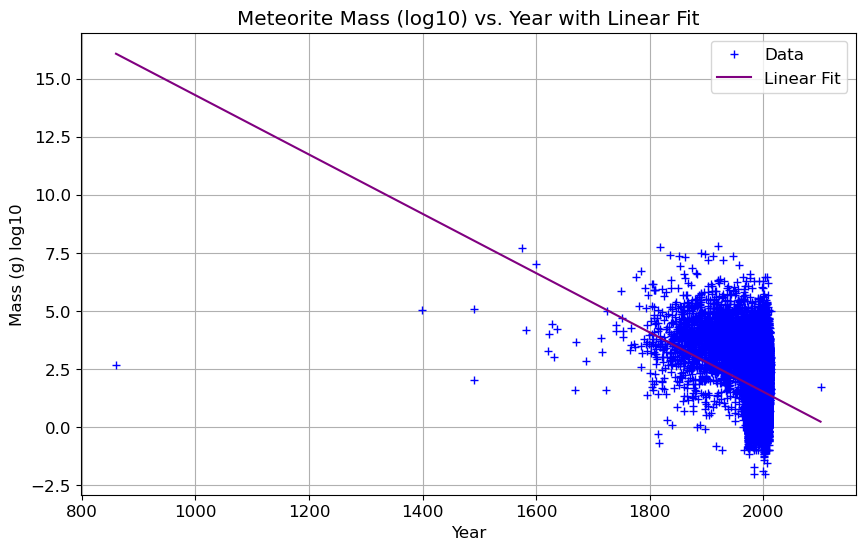

SyntaxError: 'return' outside function (3090966839.py, line 43)

In [185]:
#This entire cell is the complete code for my key linear regression plot.

#The first and second function I decided to create is "linear_fit" and "plot_fit"
#these two function perform the actual linear regression between the x and y defined in the prior cell.
#This sets up my goal for the plot and function I will use throughout the cell block. 
def linear_fit(x, m, b):
    #y = mx+b. (A standard linear equation, used for my data)
    return (m * x) +b 

def plot_fit(x_data, y_data):

#wrote x_data and y_data using np.asarry as this was the only way I found that stopped my "y is not defined error."
#This function is from the NumPy library that converts any array-like data type into an array, which also works for linear regression plots.
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    
#Including popt and pcov here for the "perr" error calculation below this cell
#The function curve_fit allos popt, pcov to operate. 
#popt uses what is inside the curve_fit function to create the ideal slope and intercept
#pcov accounts for coariance matrixes which uses uncertainties. That is why it is used to calculate errors.
popt, pcov = curve_fit(linear_fit, x_data, y_data)
m_fit, b_fit = popt #(optimal parameters for the line of best fit)

#Uses the NumPy package's polyfit to actually compute the linear regression line, which just consists of the slope and intercept for this plots goal.
slope, intercept = np.polyfit(x_data, y_data, 1)

fit_line = slope * x_data + interecpt
             
#numpy.argsort() function that is creating a sorted version of the x data so the line is more clear (straight). 
#It is necessary to help create a continous line throughout the graph instead of moving around, especially when it comes to outliers. 
#The function "np.argsort" works by sorting arrays like (x_data) into an ascending line. 
sort_idx = np.argsort(x_data)
x_sorted = x_data[sort_idx] 

#Make's sure the sorted linear regression line is shown by placing a new function where the fit is sorted acccordignly.
fit_sorted = fit_line[sort_idx] 

#def plot_fit(x_data, y_data):
   # popt, pcov =curve_fit(linear_fit, x_data, y_data)
   # slope, intercept = popt (Repeated for my own reminder)
    
#x, y = the colums of our data
#Linear_fit = the fit we are guessing
#curve_fit = the scipy function
#popt = optimal paraemeter
#pcov = covarian matrix (error on the fit)


#This section of the code makes the actual plot given the arrays like the x and y data. 
#This section of the code like 'b+' changes dots into a '+' symbol, makes my line purple, and labels axes' for
#readbility and clarity to show which data is presented where (x or y). 
plt.figure(figsize =(10,6))
plt.plot(x_data, y_data,'b+', label = "Data")
plt.plot (x_sorted, fit_sorted,
          color = "purple", 
          label = "Linear Fit")
plt.title("Meteorite Mass (log10) vs. Year with Linear Fit")
plt.xlabel("Year")
plt.ylabel("Mass (g) log10")
plt.legend()
plt.show()

#prints the plot
return slope, intercept
slope, intercept = plot_fit(x_data = x_data, y_data = y_data)


In [194]:
#The purpose of the cell block is defining errors and uncertainties of the fitted slope from the covariance matrix.
#Covariance matrix is a matrix that shows the measure of two random variables change together through a linear relationship.
#Paraemeter Error Block 
#This NumPy array function calculates the squeare roots of the diagnal of covariance matrix to determine parameter uncertainties
perr = np.sqrt(np.diag(pcov))
m_err, b_err = perr

print(f"Slope: {m_fit:.2f} +/- {m_err:.2f}")
print(f"Intercept: {b_fit:.2f} +/- {b_err:.2f}")

#Reduced Chi-Square (also seen as X^2) shows the statsitics of how well the linear model fits the data by using a statsitic calculation. 

residuals = y_data - linear_fit(x_data, m_fit, b_fit) #Calculates the residusals as (observed minus the model)
#The chi-squared statistic utilzing the NumPy function np.sum and "**" to exponent the residuals to the second X^2)
chi2 = np.sum(residuals**2)

#dof stands for Degrees of freedom. Degrees of freedom is a subtraction of the amount of points in my data len(y_data) by the number of parameters len(popt).
#len is the "length" of something, so the number, hence len is used for the subtraction. 
dof = len(y_data) - len(popt)

#This is a reduced chi squared. It helps determine how well this model actually fits considering it is tehortical to the number of dof.
#any value near one for this calculation is best. the greater the less accurate a fit likley is within the model assement. 
chi2_reduced = chi2 / dof

#this prints the reduce shi-square to a number with 2 floating points (in other words: decimal)
print(f"Reduced chi-squared: {chi2_reduced:.2f}")

Slope: -0.01 +/- 0.00
Intercept: 27.04 +/- 0.41
Reduced chi-squared: 6370.65


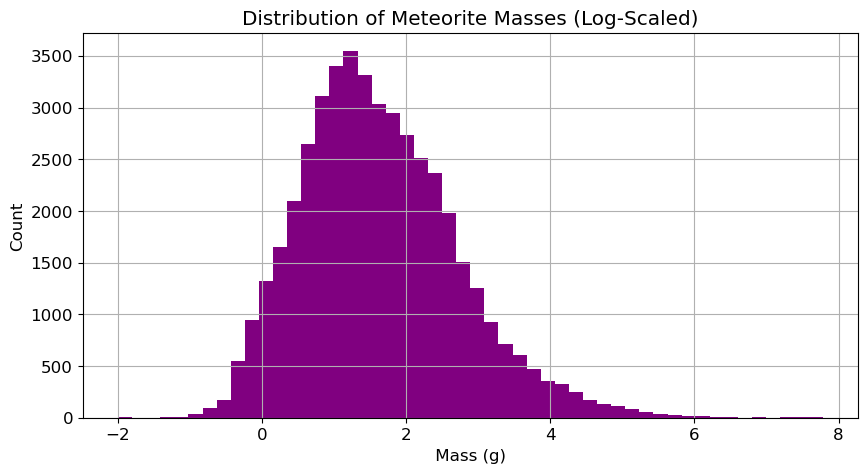

In [195]:
#Histogram
#This code cell's purpose is to create a visual of the distribution of meteorite masses by using
#a supporting graph of a histogram scaed to log10 for the values.
#This graph makes the distribution easier to interpret when it comes to understanding the vast range of meteriote masses and patterns amongst the masses. 
#The log10 conversion of the values is to make it easier to interpret the values and ensure the plot is not being dominated by outliers.

#Uses the matplotlib.pyplot package to create the histogram, convert the values, and specify visuals like the color and amount of bins.
#50 bins is just an arbitrary number that helps give a detailed enough distribution to analyze it visually.
plt.hist(np.log10(mass_data['mass_g']), bins=50, color='purple')

#Legend, titles, labels (x and y),& histogram apperance.
plt.title('Distribution of Meteorite Masses (Log-Scaled)')
plt.xlabel(" Mass (g) ")
plt.ylabel("Count")

#shows histogram
plt.show()

In [188]:
#The code above creates a histogram for this specific data set. If someone else were to use this code with a different csv file of metoerites mass, the histogram will appear different. Overall, metorite masses vary, so in order to better visualize the range, this histogram plotts the mass (in grams) to log 10. This shows the range of large metorites from grams to kilograms with some outliers in this specific case.

In [189]:
#Below will be a geographic scatter plot to map meteorites

In [190]:
#Making sure the data for the geographic locations are all possible. Filtering through any unrealistic values since there is so much data.
geo_data =data.dropna(subset=['reclong' , 'reclat']) #defining function geodata and creating a subset from the original file with the only values we need for the geographic plot.

#Helps filter through the large amount of data to make sure all longitude and latitude values are realistic and possible so the actual geographical map is easier to analyze without seeing outliers or "mess-ups".
geo_data = geo_data [(geo_data['reclat'] >= -90) & (geo_data['reclat'] <= 90) & (geo_data['reclong'] >= -180) & (geo_data['reclong'] <=180)]


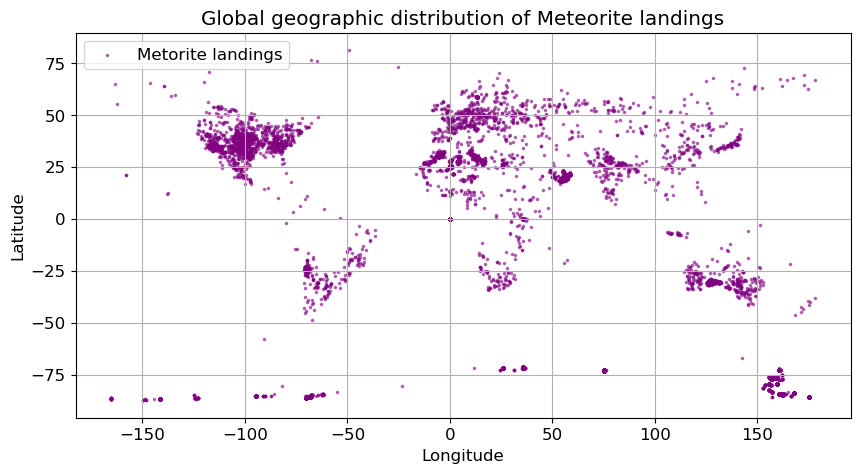

In [203]:
#The purpose of this code cells is to visually see the location of where meteorite landings hav been recorded around the world. In order to visualize any patterns and determine which regions have the largest and least amount of metoerite masses found.
#defining x_data and y_data for this geographic plot. In this case, determining which represents x being longitude and y being latitude)
x_data = geo_data['reclong'] 
y_data=geo_data['reclat']

#defining my main function for this geographical plot. 
def plot_metoerite_scatter(x_data, y_data): #shows the map in a 2d shape utilzing pre-defined numpyarrays of my x and y data.
   #plt.figure(figsize=(10,5)) #can edit this per preference. I commented this out as I like the default sizing for the figure.
    #using the matplotlib.pyplot package to create the scatterplot
    plt.scatter(
        x_data,
        y_data,

        #alpha is a function that make sthe markers (purple dots) somewhat transparnet as many points overlap and it makes seeing density in certain regions easier to note.
        alpha=0.5,
        color = "purple",

        #s is the function that allows the marker size to be changed. 2.5 is a very small marker size which is intentional since the dataset is quite dense. However, it can be edited for preference and easier observation.
        s=2.5, 
        label="Metorite landings"
#I did not include a line of best fit in this function as it wouldn't make much sense when analyzing the geographic location of metoerite falls.
    )
    #displays the geographic plot with title, labels, and a legend to indicate what the purple markers are.
    plt.title("Global geographic distribution of Meteorite landings")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show

plot_metoerite_scatter(x_data = x_data, y_data =y_data)
